# Homework 4, Part 1: Φτιάχνουμε ένα pandas cheat sheet

**Χρησιμοποιούμε το αρχείο `animals.csv` για να απαντήσουμε στις παρακάτω ερωτήσεις.** Το notebook αυτό θα μπορείτε να το χρησιμοποιήσετε μελλοντικά. 

## 0) Setup

Κάντε Import pandas **με την σωστή ονομασία** και εισάγετε την `matplotlib` για να εμφανίζονται τα γραφικά στο notebook.

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

## 1) Διαβάστε το csv 


In [2]:
df= pd.read_csv('animals.csv')

## 2) Τσεκάρετε τα δεδομένα 

Τυπώστε τον αριθμό γραμμών και στηλών καθώς και το όνομα και τον τύπο της κάθε στήλης (column).

In [3]:
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


## 3) Τυπώστε τα πρώτα 3 ζώα.

Γνωρίζουμε πως να εμφανίσουμε τα πρώτα 5, αλλά όχι τα πρώτα 3. 

In [4]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Σορτάρετε τα ζωά για να τυπώσετε τα 3 μακρύτερα 

> **Συμβουλή:** Χρησιμοποιήστε το `.head()` μετά το sort!

In [5]:
df.sort_values(by='length' , ascending=False , inplace=True)
df.head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Πάρτε το mean και το standard deviation από τα μήκη των ζώων.

In [7]:
df.mean()

length    43.666667
dtype: float64

In [8]:
df.std()

length    12.516656
dtype: float64

## 6) Πόσες γάτες και πόσοι σκύλοι υπάρχουν στα δεδομένα? 


In [9]:
df['animal'].value_counts()

dog    3
cat    3
Name: animal, dtype: int64

## 7) Τυπώστε μόνο τους σκύλους 

> **Συμβουλή:** Είναι πιο εύκολο να τυπώσετε πρώτα τη λίστα με τα `True`/`False` και μετά βάλτε την εντολή μέσα σε ένα ακόμα `df[]`.

In [10]:
df[df['animal']== 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Τωπώστε τα ζώα με μήκος μεγαλύτερο από 40cm

In [11]:
df[df['length']> 40]

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 9) `length` είναι το μέγεθος των ζώων σε εκατοστά. Φτιάξτε μια νέα στήλη που να λέγεται  `meters` και αντιστοιχεί στο μέγεθος των ζώων σε μέτρα. 

In [12]:
df['length in m']= df['length'] / 100

In [13]:
df

,animal,name,length,length in m
2,dog,Egglesburg,65,0.65
3,dog,Devon,50,0.50
1,cat,Bob,45,0.45
0,cat,Anne,35,0.35
5,dog,Fontaine,35,0.35
4,cat,Charlie,32,0.32


## 10) Σώστε τις γάτες σε μια νέα μεταβλητή που να λέγεται  `cats` και σε μια άλλη τους σκύλους `dogs`. 

In [14]:
cats=df[df['animal']=='cat']
dogs=df[df['animal']=='dog']

## 11) Τυπώστε όλα τα ζώα που είναι γάτες και το μήκος τους είναι πάνω από 12 εκατοστά 

Πρώτα κάντε το χρησιμοποιώντας την μεταβλητή `cats` και μετά ξανά σε όλο το `df`.

> **Συμβουλή:** Για πολλαπλά conditions, χρησιμοποιήστε `df[(one condition) & (another condition)]`

In [15]:
cats[cats['length']>12]

,animal,name,length,length in m
1,cat,Bob,45,0.45
0,cat,Anne,35,0.35
4,cat,Charlie,32,0.32


In [16]:
df[(df['animal']== 'cat') & (df['length']>12)]

,animal,name,length,length in m
1,cat,Bob,45,0.45
0,cat,Anne,35,0.35
4,cat,Charlie,32,0.32


## 12) Ποιο είναι το μέσο (mean) μήκος της γάτας και ποιο του σκύλου? 

In [17]:
df[df['animal']=='dog']['length'].mean()


50.0

In [18]:
df[df['animal']=='cat']['length'].mean()

37.333333333333336

## 13) Αν δεν το κάνατε ήδη χρησιμοποιήστε το `groupby` για να ξανατυπώσετε το #12 

In [19]:
df.groupby(by=['animal'])['length'].mean()

animal
cat    37.333333
dog    50.000000
Name: length, dtype: float64

## 14) Φτιάξτε ένα ιστόγραμμα (histogram) με τα μήκη των σκύλων. 

Δεν γίνεται με χρήση του `plot()`. Αναζητήστε τη λύση στο ίντερνετ!


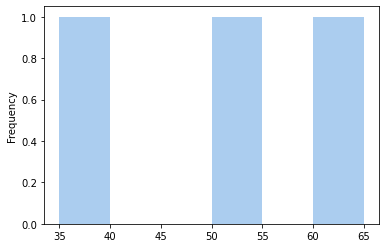

In [20]:
df[df['animal']=='dog']['length'].plot(kind= 'hist'  ,color='#abcdef', bins=6)
plt.show()
#γινεται και με το plot

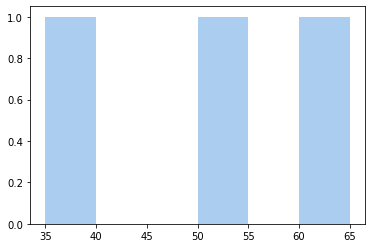

In [21]:


plt.hist(dogs.length, bins=6  ,color='#abcdef' )
plt.show()

## 15) Φτιάξτε ένα οριζόντιο γράφημα με τα μήκη των ζώων και με το όνομά τους στο label

> **Συμβουλή:** Δεν είναι με `df['length'].plot()`, γιατί χρειάζεται δύο στήλες. 

> **Συμβουλή:** Μπορείτε να αλλάξετε το μέγεθος του γραφήματος με `figsize=(2,15)`

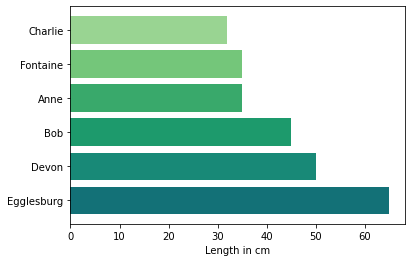

In [22]:
plt.barh(df.name  , df.length , color=[ '#137177','#188977','#1D9A6C','#39A96B','#74C67A','#99D492'])
plt.xlabel('Length in cm')
plt.show()

## 16) Φτιάξτε ένα σορταρισμένο οριζόντιο γράφημα με τις γάτες και οι μακρύτερες να βρίσκονται στην κορυφή. 

In [23]:
cats.sort_values(by = 'length' , inplace =True )
cats

<ipython-input-23-8ae01d6e849b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats.sort_values(by = 'length' , inplace =True )


,animal,name,length,length in m
4,cat,Charlie,32,0.32
0,cat,Anne,35,0.35
1,cat,Bob,45,0.45


<BarContainer object of 3 artists>

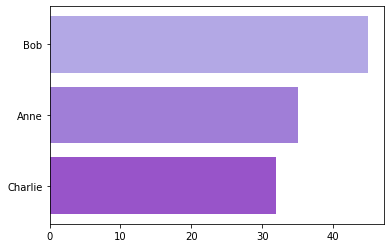

In [24]:
plt.barh(cats.name  , cats.length , color=[ '#9854C9','#A07ED7','#B3A8E5'])